# Question 4 Part 2

## Description

Read Motors image and apply sobel filter and apply custom filter named F, finally, compare the result

## Import required dependencies

- Import cv2 for read and map the color channels
- Import numpy to work with arrays
- Import matplotlib to show image for each step

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read and Show Paper

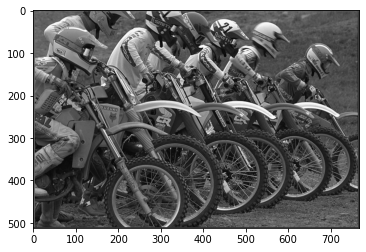

In [2]:
motors = cv2.imread("../images/kodim05.png")

# Convert BGR order to RGB
motors = cv2.cvtColor(motors, cv2.COLOR_BGR2GRAY)

plt.imshow(motors, cmap='gray')

## Sobel Filter

Define Sobel filter in x axle and y axle

In [3]:
sobel_filter_hx = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])
    
sobel_filter_hy = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

## Define Correlation Function

An operation between every part of an image and kernel

In [4]:
def correlation(image, kernel):
    image_width = image.shape[1]
    image_height = image.shape[0]
    kernel_height, kernel_width = kernel.shape

    result = np.zeros(image.shape)

    for c in range(1 if len(image.shape) < 3 else image.shape[2]):
        padding_image = np.zeros((image_height + kernel_height - 1,
                                  image_width + kernel_width - 1))

        if len(image.shape) < 3:
            padding_image[round((kernel_height - 1) / 2):image_height + round((kernel_height - 1) / 2),
                          round((kernel_width - 1) / 2):image_width + round((kernel_width - 1) / 2)] \
                = image[:, :]
        else:
            padding_image[round((kernel_height - 1) / 2):image_height + round((kernel_height - 1) / 2),
                          round((kernel_width - 1) / 2):image_width + round((kernel_width - 1) / 2)] \
                = image[:, :, c]

        for y in range(image_height + round((kernel_height - 1) / 2)):
            for x in range(image_width + round((kernel_width - 1) / 2)):
                sample = padding_image[y:y + kernel_height, x:x + kernel_width]
                if sample.shape != kernel.shape:
                    continue
                if len(image.shape) < 3:
                    result[y, x] = np.sum(sample * kernel)
                else:
                    result[y, x, c] = np.sum(sample * kernel)
                    
    result = result / result.max() * 255

    return result

## Apply Sobel Filter

Apply sobel filter using correlation function in both axle and aggregate them

Text(0.5, 1.0, 'Aggregation')

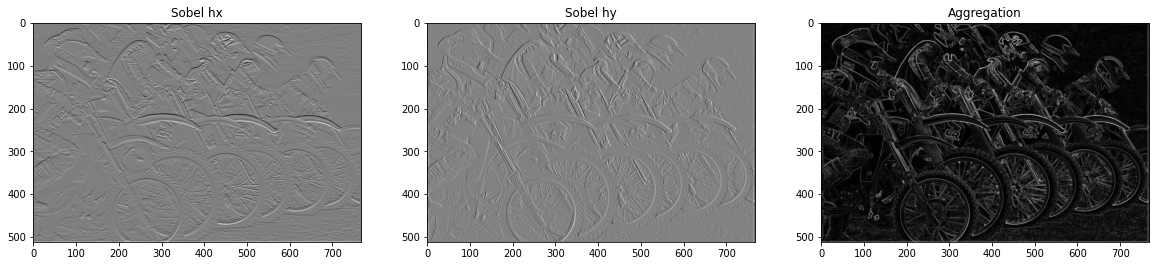

In [5]:
motors_sobel_hx = correlation(motors, sobel_filter_hx)
motors_sobel_hy = correlation(motors, sobel_filter_hy)

f, subplt = plt.subplots(1,3,figsize=(20,10))
subplt[0].imshow(motors_sobel_hx, cmap='gray')
subplt[0].set_title("Sobel hx")
subplt[1].imshow(motors_sobel_hy, cmap='gray')
subplt[1].set_title("Sobel hy")
subplt[2].imshow(np.sqrt(np.power(motors_sobel_hx, 2) + np.power(motors_sobel_hy, 2)), cmap='gray')
subplt[2].set_title("Aggregation")

As result, Sobel hx show edges in x axle and Sobel hy show edges in y axle

## Apply F Filters

Apply F filter using correlation function in both axle and aggregate them

Text(0.5, 1.0, 'Aggregation')

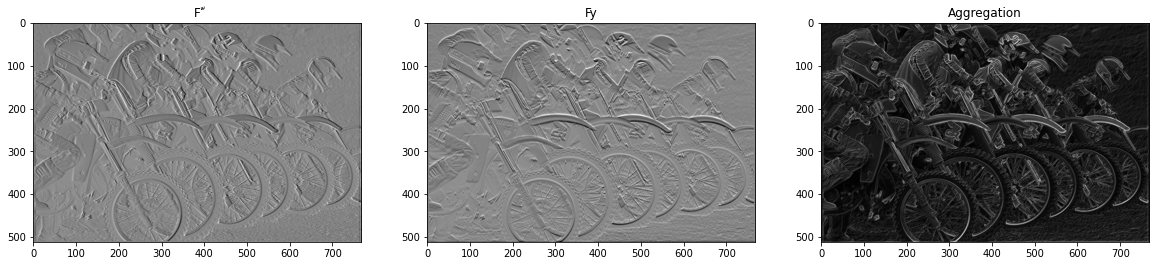

In [6]:
Fx= np.array([[-0.0052625, -0.0173466, -0.0427401, -0.0768961, -0.957739, -0.0696751, 0, 0.6696751, 0.0957739, 0.0768961, 0.0427401, 0.0173466, 0.0052625]])
Fy= np.array([[-0.0052625], [-0.0173466], [-0.0427401], [-0.0768961], [-0.957739], [-0.0696751], [0], [0.6696751], [0.0957739], [0.0768961], [0.0427401], [0.0173466], [0.0052625]])

motors_F_x = correlation(motors, Fx)
motors_F_y = correlation(motors, Fy)

f, subplt = plt.subplots(1,3,figsize=(20,10))
subplt[0].imshow(motors_F_x, cmap='gray')
subplt[0].set_title("Fّ")
subplt[1].imshow(motors_F_y, cmap='gray')
subplt[1].set_title("Fy")
subplt[2].imshow(np.sqrt(np.power(motors_F_x, 2) + np.power(motors_F_y, 2)), cmap='gray')
subplt[2].set_title("Aggregation")

The Sobel filter show edge better than F filter, the F filter can't handle edges for motorcycle riders clothes